# This notebook is used for computing the human hand pose to control the mechanical hand in MuJoCo simulation environmnent.
Steps:
1.Acquire the human hand pose data
2.Compute the human hand joint
3.Acuate the mechanical hand for motion in mujoco

## 1.Acquire the human hand pose data

In [ ]:
from skimage import io
image = io.imread('/data/openpose/doc/media/keypoints_hand.png')
io.imshow(image)

create data
Loading cache data from /home/jade/DRL/codes/MuJoCo/Hand_Control/data_importer/data_importer/cache/MSRA15Importer_P0_None_gt_200_cache.pkl
/home/jade/DRL/codes/MuJoCo/Hand_Control/data_importer/data_importer/cache/MSRA15Importer_P0_None_gt_200_cache.pkl
Shuffling
you now choosing seq 0 6


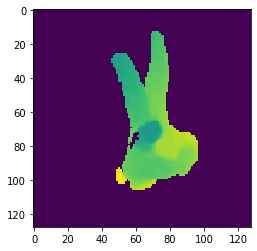

In [22]:
import sys
import numpy as np
# sys.path.append("/data/msra_importer/")

%matplotlib inline
from data_importer.importer import Anyone
# idx = np.random.randint(3000)
# ay = Anyone(idx)
ay = Anyone(6)

In [ ]:
idx=20
ay.draw_point(idx)
# ind = ind +

In [2]:
import sys
import numpy as np
sys.path.append("/home/jade/DRL/codes/MuJoCo/Hand_Control/data_importer/data_importer")
sys.path.append("/home/jade/DRL/codes/MuJoCo/Hand_Control/TeachNet-Zenmme/dataset/utilities")

%matplotlib inline
from mpl_importer import MPL
# idx = np.random.randint(3000)
# ay = Anyone(idx)
mpl = MPL(7)
mpl.show_depth_img(7429)

creating data for human hand from MSRA15...
Loading cache data from /home/jade/DRL/codes/MuJoCo/Hand_Control/TeachNet-Zenmme/dataset/human/MSRA15_CACHE/MSRA15Importer_P7_None_gt_160_cache.pkl
/home/jade/DRL/codes/MuJoCo/Hand_Control/TeachNet-Zenmme/dataset/human/MSRA15_CACHE/MSRA15Importer_P7_None_gt_160_cache.pkl
Shuffling
you now choosing seq 0 7429


In [3]:
mpl.draw_point(idx=7429)


In [4]:
# finger_data = ay.data.gtorig
finger_data = mpl.data[7429].gtorig
print(finger_data)

[[186.56902  140.95683  376.709   ]
 [216.43066  122.72373  349.568   ]
 [214.88979  130.11545  327.503   ]
 [204.16669  138.29214  334.233   ]
 [197.32333  140.81721  348.996   ]
 [209.08731  112.11336  346.452   ]
 [210.30714  117.25644  318.072   ]
 [198.86606  126.7676   323.512   ]
 [192.29938  129.36023  339.736   ]
 [199.79031  105.48617  346.678   ]
 [204.00165  102.98865  320.67    ]
 [196.48773  113.19611  319.027   ]
 [189.76971  120.86361  329.061   ]
 [185.79742  102.373146 346.403   ]
 [191.73015   93.27489  333.085   ]
 [191.42384   98.152435 324.266   ]
 [187.62784  106.75917  326.223   ]
 [193.32188  140.24918  354.345   ]
 [203.4939   137.9228   335.889   ]
 [212.54916  135.85187  321.005   ]
 [223.04073  134.85574  306.277   ]]


In [5]:
# dynamic show the 3d hand keypoints pos for different viewangle
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time


fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

# prepare the 3d finger keypoints data
x1 = np.append(finger_data[0][0],[k[0] for k in finger_data[17:21]])
y1 = np.append(finger_data[0][1],[k[1] for k in finger_data[17:21]])
z1 = np.append(finger_data[0][2],[k[2] for k in finger_data[17:21]])

x2 = np.append(finger_data[0][0],[k[0] for k in finger_data[1:5]])
y2 = np.append(finger_data[0][1],[k[1] for k in finger_data[1:5]])
z2 = np.append(finger_data[0][2],[k[2] for k in finger_data[1:5]])

x3 = np.append(finger_data[0][0],[k[0] for k in finger_data[5:9]])
y3 = np.append(finger_data[0][1],[k[1] for k in finger_data[5:9]])
z3 = np.append(finger_data[0][2],[k[2] for k in finger_data[5:9]])

x4 = np.append(finger_data[0][0],[k[0] for k in finger_data[9:13]])
y4 = np.append(finger_data[0][1],[k[1] for k in finger_data[9:13]])
z4 = np.append(finger_data[0][2],[k[2] for k in finger_data[9:13]])

x5 = np.append(finger_data[0][0],[k[0] for k in finger_data[13:17]])
y5 = np.append(finger_data[0][1],[k[1] for k in finger_data[13:17]])
z5 = np.append(finger_data[0][2],[k[2] for k in finger_data[13:17]])

# def generate(X, Y, phi):
#     '''
#     Generates Z data for the points in the X, Y meshgrid and parameter phi.
#     '''
#     R = 1 - np.sqrt(X**2 + Y**2)
#     return np.cos(2 * np.pi * X + phi) * R

# # Make the X, Y meshgrid.
# xs = np.linspace(-1, 1, 50)
# ys = np.linspace(-1, 1, 50)
# X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
# ax.set_zlim(-1, 1)

# plot and rotate
wframe1 = None
tstart = time.time()
# for phi in np.linspace(0, 180. / np.pi, 100):
# for i in np.linspace(0,360,360):
    # If a line collection is already remove it before drawing.
if wframe1:
    ax.collections.remove(wframe1)
    ax.collections.remove(wframe2)
    ax.collections.remove(wframe3)
    ax.collections.remove(wframe4)
    ax.collections.remove(wframe5)

# Plot the new wireframe and pause briefly before continuing.
#     Z = generate(X, Y, phi)
#     wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
plt.title('Hand Keypoints')
wframe1 = ax.plot(x1,y1,z1,c='r',marker='.',linewidth=1,alpha=1,label='thumb')
wframe2 = ax.plot(x2,y2,z2,c='g',marker='.',linewidth=1,alpha=1,label='index')
wframe3 = ax.plot(x3,y3,z3,c='b',marker='.',linewidth=1,alpha=1,label='middle')
wframe4 = ax.plot(x4,y4,z4,c='y',marker='.',linewidth=1,alpha=1,label='ring')
wframe5 = ax.plot(x5,y5,z5,c='k',marker='.',linewidth=1,alpha=1,label='pinky')

#     ax.axis('scaled')
ax.axis('image')
ax.set_xlabel('x pos')
ax.set_ylabel('y pos')
ax.set_zlabel('z pos')

plt.pause(.001)

print('Average FPS: %f' % (100 / (time.time() - tstart)))

FigureCanvasNbAgg()

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

In [13]:
# test for the mapping data from the human hand to the model hand MPL/Adroit

from hand_mapping import hand_keypoints_mapping

print(finger_data)
finger_data_mapping = hand_keypoints_mapping.calc_model_mpl_keypoints(finger_data)
print(finger_data_mapping)

[[186.56902  140.95683  376.709   ]
 [216.43066  122.72373  349.568   ]
 [214.88979  130.11545  327.503   ]
 [204.16669  138.29214  334.233   ]
 [197.32333  140.81721  348.996   ]
 [209.08731  112.11336  346.452   ]
 [210.30714  117.25644  318.072   ]
 [198.86606  126.7676   323.512   ]
 [192.29938  129.36023  339.736   ]
 [199.79031  105.48617  346.678   ]
 [204.00165  102.98865  320.67    ]
 [196.48773  113.19611  319.027   ]
 [189.76971  120.86361  329.061   ]
 [185.79742  102.373146 346.403   ]
 [191.73015   93.27489  333.085   ]
 [191.42384   98.152435 324.266   ]
 [187.62784  106.75917  326.223   ]
 [193.32188  140.24918  354.345   ]
 [203.4939   137.9228   335.889   ]
 [212.54916  135.85187  321.005   ]
 [223.04073  134.85574  306.277   ]]
[[186.56902  140.95683  376.709   ]
 [273.34186   87.97457  297.84186 ]
 [270.46664  101.76725  256.66937 ]
 [253.02895  115.06403  267.6136  ]
 [244.9216   118.0555   285.1034  ]
 [255.0524    53.237106 284.69037 ]
 [256.8912    60.989918 241

## 2.Comupute the human hand joint
> Method:利用两点组成空间向量，空间向量的夹角即为关节角度

In [7]:
import sys
sys.path.append("/home/jade/DRL/codes/MuJoCo/Hand_Control/")

# from joint_position_calculator import get_pose
# hand_pose = get_pose.get_hand_joint_pose(finger_data)
# print(hand_pose)
# from joint_position_calculator import get_pose_new4
# hand_pose = get_pose_new4.get_hand_joint_pose(finger_data)
# print(hand_pose)
from joint_position_calculator import get_pose_new4
hand_pose = get_pose_new4.get_hand_joint_pose(finger_data)
print(hand_pose)



{'thumb': [1.5707779479203265, -0.2218258802797903, -0.0433752916924508, -0.09594747985797088], 'index': [-0.24503177279849153, 1.1536831851334928, 1.775756602401698, 0.6773498575713507], 'middle': [-0.22121950451832673, 0.9863823157502987, 1.835007954618539, 0.835379123569721], 'ring': [-0.031094942885827204, 0.7218420210108141, 1.6133988465231939, 0.9096177682802462], 'pinky': [0.13840279894014157, 0.2482054254404533, 1.1469869621743027, 1.3003229098847429]}


In [15]:
# test example for show the result

from numpy.testing import assert_array_equal,assert_almost_equal
from mujoco_py import MjSim, MjViewer, load_model_from_xml, load_model_from_path, MjSimState, ignore_mujoco_warnings
import mujoco_py
import numpy as np
import cv2
from skimage.io import imsave, imshow
import matplotlib.pyplot as plt

import json
from funtest.test_pathlib import first_try

import sys
sys.path.append("/home/jade/DRL/codes/MuJoCo/Hand_Control/")
# from joint_position_calculator import get_pose 
from joint_position_calculator import get_pose_new4

import time

xml_path = "/home/jade/DRL/codes/MuJoCo/Resources/xml_model/MPL/robot_hand.xml"
model = load_model_from_path(xml_path)
sim = MjSim(model)
viewer = MjViewer(sim)
# sim.forward()

def print_hand_joint_pose(sim):
    print("hand pose:")
    print("wrist=", sim.data.get_joint_qpos("wrist_PRO"), sim.data.get_joint_qpos("wrist_UDEV"), sim.data.get_joint_qpos("wrist_FLEX"))
    print("thumb=", sim.data.get_joint_qpos("thumb_ABD"), sim.data.get_joint_qpos("thumb_MCP"), sim.data.get_joint_qpos("thumb_PIP"), sim.data.get_joint_qpos("thumb_DIP"))
    print("index=", sim.data.get_joint_qpos("index_ABD"), sim.data.get_joint_qpos("index_MCP"), sim.data.get_joint_qpos("index_PIP"), sim.data.get_joint_qpos("index_DIP"))
    print("middle=", sim.data.get_joint_qpos("middle_ABD"), sim.data.get_joint_qpos("middle_MCP"), sim.data.get_joint_qpos("middle_PIP"), sim.data.get_joint_qpos("middle_DIP"))
    print("ring=", sim.data.get_joint_qpos("ring_ABD"), sim.data.get_joint_qpos("ring_MCP"), sim.data.get_joint_qpos("ring_PIP"), sim.data.get_joint_qpos("ring_DIP"))
    print("pinky=", sim.data.get_joint_qpos("pinky_ABD"), sim.data.get_joint_qpos("pinky_MCP"), sim.data.get_joint_qpos("pinky_PIP"), sim.data.get_joint_qpos("pinky_DIP"))

    
print_hand_joint_pose(sim)

# sim.data.set_joint_qpos('wrist_PRO', 3.14)          #將手上下番了180°
wrist_j0 = sim.model.get_joint_qpos_addr("wrist_PRO")
wrist_j1 = sim.model.get_joint_qpos_addr("wrist_UDEV")
wrist_j2 = sim.model.get_joint_qpos_addr("wrist_FLEX")

thumb_j0 = sim.model.get_joint_qpos_addr("thumb_ABD")
thumb_j1 = sim.model.get_joint_qpos_addr("thumb_MCP")
thumb_j2 = sim.model.get_joint_qpos_addr("thumb_PIP")
thumb_j3 = sim.model.get_joint_qpos_addr("thumb_DIP")

index_j0 = sim.model.get_joint_qpos_addr("index_ABD")
index_j1 = sim.model.get_joint_qpos_addr("index_MCP")
index_j2 = sim.model.get_joint_qpos_addr("index_PIP")
index_j3 = sim.model.get_joint_qpos_addr("index_DIP")

middle_j0 = sim.model.get_joint_qpos_addr("middle_ABD")
middle_j1 = sim.model.get_joint_qpos_addr("middle_MCP")
middle_j2 = sim.model.get_joint_qpos_addr("middle_PIP")
middle_j3 = sim.model.get_joint_qpos_addr("middle_DIP")

ring_j0 = sim.model.get_joint_qpos_addr("ring_ABD")
ring_j1 = sim.model.get_joint_qpos_addr("ring_MCP")
ring_j2 = sim.model.get_joint_qpos_addr("ring_PIP")
ring_j3 = sim.model.get_joint_qpos_addr("ring_DIP")

pinky_j0 = sim.model.get_joint_qpos_addr("pinky_ABD")
pinky_j1 = sim.model.get_joint_qpos_addr("pinky_MCP")
pinky_j2 = sim.model.get_joint_qpos_addr("pinky_PIP")
pinky_j3 = sim.model.get_joint_qpos_addr("pinky_DIP")

sim_state = sim.get_state()

sim_state.qpos[wrist_j0] = 0.0
sim_state.qpos[wrist_j1] = 0.0
sim_state.qpos[wrist_j2] = 0.0

# sim_state.qpos[thumb_j0] = hand_pose['thumb'][0]
# sim_state.qpos[thumb_j1] = hand_pose['thumb'][1]
# sim_state.qpos[thumb_j2] = hand_pose['thumb'][2]
# sim_state.qpos[thumb_j3] = hand_pose['thumb'][3]
sim_state.qpos[thumb_j0] = 0.0
sim_state.qpos[thumb_j1] = 0.0
sim_state.qpos[thumb_j2] = 0.0
sim_state.qpos[thumb_j3] = 0.0

# sim_state.qpos[index_j0] = 0.0
sim_state.qpos[index_j0] = hand_pose['index'][0]
sim_state.qpos[index_j1] = hand_pose['index'][1]
sim_state.qpos[index_j2] = hand_pose['index'][2]
sim_state.qpos[index_j3] = hand_pose['index'][3]
# sim_state.qpos[index_j0] = np.pi/4
# sim_state.qpos[index_j1] = 0.0
# sim_state.qpos[index_j2] = 0.0
# sim_state.qpos[index_j3] = 0.0

# sim_state.qpos[middle_j0] = 0.0
sim_state.qpos[middle_j0] = hand_pose['middle'][0]
sim_state.qpos[middle_j1] = hand_pose['middle'][1]
sim_state.qpos[middle_j2] = hand_pose['middle'][2]
sim_state.qpos[middle_j3] = hand_pose['middle'][3]
# sim_state.qpos[middle_j0] = np.pi/4
# sim_state.qpos[middle_j1] = 0.0
# sim_state.qpos[middle_j2] = 0.0
# sim_state.qpos[middle_j3] = 0.0

# sim_state.qpos[ring_j0] = 0.0
sim_state.qpos[ring_j0] = hand_pose['ring'][0]
sim_state.qpos[ring_j1] = hand_pose['ring'][1]
sim_state.qpos[ring_j2] = hand_pose['ring'][2]
sim_state.qpos[ring_j3] = hand_pose['ring'][3]
# sim_state.qpos[ring_j0] = np.pi/4
# sim_state.qpos[ring_j1] = 0.0
# sim_state.qpos[ring_j2] = 0.0
# sim_state.qpos[ring_j3] = 0.0

# sim_state.qpos[pinky_j0] = 0.0
sim_state.qpos[pinky_j0] = hand_pose['pinky'][0]
sim_state.qpos[pinky_j1] = hand_pose['pinky'][1]
sim_state.qpos[pinky_j2] = hand_pose['pinky'][2]
sim_state.qpos[pinky_j3] = hand_pose['pinky'][3]
# sim_state.qpos[pinky_j0] = np.pi/4
# sim_state.qpos[pinky_j1] = 0.0
# sim_state.qpos[pinky_j2] = 0.0
# sim_state.qpos[pinky_j3] = 0.0

sim.set_state(sim_state)

sim.forward()
sim.step()
# assert sim.data.ncon == 0, 'Collision Detected!'
print("move hand to", hand_pose)
print_hand_joint_pose(sim)
viewer.render()
# assert sim.data.ncon == 0, 'Collision Detected!'
time.sleep(10)
# else:
#     continue

Creating window glfw
hand pose:
wrist= 0.0 0.0 0.0
thumb= 0.0 0.0 0.0 0.0
index= 0.0 0.0 0.0 0.0
middle= 0.0 0.0 0.0 0.0
ring= 0.0 0.0 0.0 0.0
pinky= 0.0 0.0 0.0 0.0
move hand to {'thumb': [1.5707779479203265, -0.2218258802797903, -0.0433752916924508, -0.09594747985797088], 'index': [-0.24503177279849153, 1.1536831851334928, 1.775756602401698, 0.6773498575713507], 'middle': [-0.22121950451832673, 0.9863823157502987, 1.835007954618539, 0.835379123569721], 'ring': [-0.031094942885827204, 0.7218420210108141, 1.6133988465231939, 0.9096177682802462], 'pinky': [0.13840279894014157, 0.2482054254404533, 1.1469869621743027, 1.3003229098847429]}
hand pose:
wrist= 1.4645229165468426e-06 -8.74268988948837e-06 -2.3589856226660215e-05
thumb= 4.6428674130746313e-07 -9.488881877116515e-07 -4.244987541158831e-07 -1.1208746379807932e-07
index= -0.24262824871832064 1.1519910205760122 1.7680564321819152 0.6816974436250279
middle= -0.22121967147958077 0.9866595019976493 1.8271238189021493 0.838723537547782

In [ ]:
# test for the mapping method(human hand unit:mm)

import sys
sys.path.append("/home/jade/DRL/codes/MuJoCo/Hand_Control/")

from hand_mapping import hand_keypoints_mapping

hand_length = hand_keypoints_mapping.calc_human_fingers_length(finger_data)
print(hand_length)

## 3. Drive the mechanical hand for motion in mujoco

In [ ]:
# for mujoco mechanical hand MPL

from numpy.testing import assert_array_equal,assert_almost_equal
from mujoco_py import MjSim, MjViewer, load_model_from_xml, load_model_from_path, MjSimState, ignore_mujoco_warnings
import mujoco_py
import numpy as np
import cv2
from skimage.io import imsave, imshow
import matplotlib.pyplot as plt

import json
from funtest.test_pathlib import first_try

import sys
sys.path.append("/home/jade/DRL/codes/MuJoCo/Hand_Control/")
from joint_position_calculator import get_pose 

import time

xml_path = "/home/jade/DRL/codes/MuJoCo/xml_model/MPL/robot_hand.xml"
model = load_model_from_path(xml_path)
sim = MjSim(model)
viewer = MjViewer(sim)
# sim.forward()

def print_hand_joint_pose(sim):
    print("hand pose:")
    print("wrist=", sim.data.get_joint_qpos("wrist_PRO"), sim.data.get_joint_qpos("wrist_UDEV"), sim.data.get_joint_qpos("wrist_FLEX"))
    print("thumb=", sim.data.get_joint_qpos("thumb_ABD"), sim.data.get_joint_qpos("thumb_MCP"), sim.data.get_joint_qpos("thumb_PIP"), sim.data.get_joint_qpos("thumb_DIP"))
    print("index=", sim.data.get_joint_qpos("index_ABD"), sim.data.get_joint_qpos("index_MCP"), sim.data.get_joint_qpos("index_PIP"), sim.data.get_joint_qpos("index_DIP"))
    print("middle=", sim.data.get_joint_qpos("middle_ABD"), sim.data.get_joint_qpos("middle_MCP"), sim.data.get_joint_qpos("middle_PIP"), sim.data.get_joint_qpos("middle_DIP"))
    print("ring=", sim.data.get_joint_qpos("ring_ABD"), sim.data.get_joint_qpos("ring_MCP"), sim.data.get_joint_qpos("ring_PIP"), sim.data.get_joint_qpos("ring_DIP"))
    print("pinky=", sim.data.get_joint_qpos("pinky_ABD"), sim.data.get_joint_qpos("pinky_MCP"), sim.data.get_joint_qpos("pinky_PIP"), sim.data.get_joint_qpos("pinky_DIP"))

    
print_hand_joint_pose(sim)

wrist_j0 = sim.model.get_joint_qpos_addr("wrist_PRO")
wrist_j1 = sim.model.get_joint_qpos_addr("wrist_UDEV")
wrist_j2 = sim.model.get_joint_qpos_addr("wrist_FLEX")

thumb_j0 = sim.model.get_joint_qpos_addr("thumb_ABD")
thumb_j1 = sim.model.get_joint_qpos_addr("thumb_MCP")
thumb_j2 = sim.model.get_joint_qpos_addr("thumb_PIP")
thumb_j3 = sim.model.get_joint_qpos_addr("thumb_DIP")

index_j0 = sim.model.get_joint_qpos_addr("index_ABD")
index_j1 = sim.model.get_joint_qpos_addr("index_MCP")
index_j2 = sim.model.get_joint_qpos_addr("index_PIP")
index_j3 = sim.model.get_joint_qpos_addr("index_DIP")

middle_j0 = sim.model.get_joint_qpos_addr("middle_ABD")
middle_j1 = sim.model.get_joint_qpos_addr("middle_MCP")
middle_j2 = sim.model.get_joint_qpos_addr("middle_PIP")
middle_j3 = sim.model.get_joint_qpos_addr("middle_DIP")

ring_j0 = sim.model.get_joint_qpos_addr("ring_ABD")
ring_j1 = sim.model.get_joint_qpos_addr("ring_MCP")
ring_j2 = sim.model.get_joint_qpos_addr("ring_PIP")
ring_j3 = sim.model.get_joint_qpos_addr("ring_DIP")

pinky_j0 = sim.model.get_joint_qpos_addr("pinky_ABD")
pinky_j1 = sim.model.get_joint_qpos_addr("pinky_MCP")
pinky_j2 = sim.model.get_joint_qpos_addr("pinky_PIP")
pinky_j3 = sim.model.get_joint_qpos_addr("pinky_DIP")


data_path = '/home/jade/DRL/datasets/picture/video_output/'
json_data = first_try(data_path, "VID*4734*.json")
it = iter(json_data)


while True:
    anyjson = str(next(it))
    print(anyjson)
    dt = json.load(open(anyjson))
    arr_right = np.array(dt['people'][0]['hand_right_keypoints_2d']).reshape(21,3)
    if arr_right.any():
        hand_pose = get_pose.get_hand_joint_pose(arr_right)
        print(hand_pose)

        sim_state = sim.get_state()

        sim_state.qpos[wrist_j0] = 0.0
        sim_state.qpos[wrist_j1] = 0.0
        sim_state.qpos[wrist_j2] = 0.0
        
        sim_state.qpos[thumb_j0] = 0.0
        sim_state.qpos[thumb_j1] = hand_pose['thumb'][1]
        sim_state.qpos[thumb_j2] = hand_pose['thumb'][2]
        sim_state.qpos[thumb_j3] = hand_pose['thumb'][3]
        
        sim_state.qpos[index_j0] = hand_pose['index'][0]
        sim_state.qpos[index_j1] = hand_pose['index'][1]
        sim_state.qpos[index_j2] = hand_pose['index'][2]
        sim_state.qpos[index_j3] = hand_pose['index'][3]

        sim_state.qpos[middle_j0] = hand_pose['middle'][0]
        sim_state.qpos[middle_j1] = hand_pose['middle'][1]
        sim_state.qpos[middle_j2] = hand_pose['middle'][2]
        sim_state.qpos[middle_j3] = hand_pose['middle'][3]

        sim_state.qpos[ring_j0] = hand_pose['ring'][0]
        sim_state.qpos[ring_j1] = hand_pose['ring'][1]
        sim_state.qpos[ring_j2] = hand_pose['ring'][2]
        sim_state.qpos[ring_j3] = hand_pose['ring'][3]

        sim_state.qpos[pinky_j0] = hand_pose['pinky'][0]
        sim_state.qpos[pinky_j1] = hand_pose['pinky'][1]
        sim_state.qpos[pinky_j2] = hand_pose['pinky'][2]
        sim_state.qpos[pinky_j3] = hand_pose['pinky'][3]

        sim.set_state(sim_state)

        sim.forward()
        sim.step()
#         assert sim.data.ncon == 0, 'Collision Detected!'
        print("move hand to", hand_pose)
        print_hand_joint_pose(sim)
        viewer.render()
#         assert sim.data.ncon == 0, 'Collision Detected!'
        time.sleep(0.005)
    else:
        continue
        
# frame_size = (640, 480)
# camera_name = None
# curr_frame = sim.render(width=frame_size[0], height=frame_size[1],mode='offscreen', camera_name=camera_name, device_id=0)
# plt.figure("finger")
# plt.imshow(np.flipud(curr_frame))
# plt.show()

# curr_frame = sim.render(width=frame_size[0], height=frame_size[1],mode='window', camera_name=camera_name, device_id=0)

In [ ]:
# for another mujoco mechanical hand Adroit

from numpy.testing import assert_array_equal,assert_almost_equal
from mujoco_py import MjSim, MjViewer, load_model_from_xml, load_model_from_path, MjSimState, ignore_mujoco_warnings
import mujoco_py
import numpy as np
import cv2
from skimage.io import imsave, imshow
import matplotlib.pyplot as plt

import json
from funtest.test_pathlib import first_try

import sys
sys.path.append("/home/jade/DRL/codes/MuJoCo/Hand_Control/")
from joint_position_calculator import get_pose 

import time

xml_path = "/home/jade/DRL/codes/MuJoCo/xml_model/Adroit/Adroit_hand_withOverlay.xml"
model = load_model_from_path(xml_path)
sim = MjSim(model)
viewer = MjViewer(sim)
# sim.forward()

def print_hand_joint_pose(sim):
    print("hand pose:")
    print("wrist=", sim.data.get_joint_qpos("WRJ1"), sim.data.get_joint_qpos("WRJ0"))
    print("thumb=", sim.data.get_joint_qpos("THJ4"), sim.data.get_joint_qpos("THJ3"), sim.data.get_joint_qpos("THJ2"), sim.data.get_joint_qpos("THJ1"), sim.data.get_joint_qpos("THJ0"))
    print("index=", sim.data.get_joint_qpos("FFJ3"), sim.data.get_joint_qpos("FFJ2"), sim.data.get_joint_qpos("FFJ1"), sim.data.get_joint_qpos("FFJ0"))
    print("middle=", sim.data.get_joint_qpos("MFJ3"), sim.data.get_joint_qpos("MFJ2"), sim.data.get_joint_qpos("MFJ1"), sim.data.get_joint_qpos("MFJ0"))
    print("ring=", sim.data.get_joint_qpos("RFJ3"), sim.data.get_joint_qpos("RFJ2"), sim.data.get_joint_qpos("RFJ1"), sim.data.get_joint_qpos("RFJ0"))
    print("pinky=", sim.data.get_joint_qpos("LFJ4"), sim.data.get_joint_qpos("LFJ3"), sim.data.get_joint_qpos("LFJ2"), sim.data.get_joint_qpos("LFJ1"), sim.data.get_joint_qpos("LFJ0"))

    
print_hand_joint_pose(sim)

wrist_j0 = sim.model.get_joint_qpos_addr("WRJ1")
wrist_j1 = sim.model.get_joint_qpos_addr("WRJ0")

thumb_j0 = sim.model.get_joint_qpos_addr("THJ4")
thumb_j1 = sim.model.get_joint_qpos_addr("THJ3")
thumb_j2 = sim.model.get_joint_qpos_addr("THJ2")
thumb_j3 = sim.model.get_joint_qpos_addr("THJ1")
thumb_j4 = sim.model.get_joint_qpos_addr("THJ0")

index_j0 = sim.model.get_joint_qpos_addr("FFJ3")
index_j1 = sim.model.get_joint_qpos_addr("FFJ2")
index_j2 = sim.model.get_joint_qpos_addr("FFJ1")
index_j3 = sim.model.get_joint_qpos_addr("FFJ0")

middle_j0 = sim.model.get_joint_qpos_addr("MFJ3")
middle_j1 = sim.model.get_joint_qpos_addr("MFJ2")
middle_j2 = sim.model.get_joint_qpos_addr("MFJ1")
middle_j3 = sim.model.get_joint_qpos_addr("MFJ0")

ring_j0 = sim.model.get_joint_qpos_addr("RFJ3")
ring_j1 = sim.model.get_joint_qpos_addr("RFJ2")
ring_j2 = sim.model.get_joint_qpos_addr("RFJ1")
ring_j3 = sim.model.get_joint_qpos_addr("RFJ0")

pinky_j0 = sim.model.get_joint_qpos_addr("LFJ4")
pinky_j1 = sim.model.get_joint_qpos_addr("LFJ3")
pinky_j2 = sim.model.get_joint_qpos_addr("LFJ2")
pinky_j3 = sim.model.get_joint_qpos_addr("LFJ1")
pinky_j4 = sim.model.get_joint_qpos_addr("LFJ0")


data_path = '/home/jade/DRL/datasets/picture/video_output/'
json_data = first_try(data_path, "VID*4734*.json")
it = iter(json_data)


while True:
    anyjson = str(next(it))
    print(anyjson)
    dt = json.load(open(anyjson))
    arr_right = np.array(dt['people'][0]['hand_right_keypoints_2d']).reshape(21,3)
    if arr_right.any():
        hand_pose = get_pose.get_hand_joint_pose(arr_right)
        print(hand_pose)

        sim_state = sim.get_state()

        sim_state.qpos[wrist_j0] = 0.0
        sim_state.qpos[wrist_j1] = 0.0
        
        sim_state.qpos[thumb_j0] = 0.0
        sim_state.qpos[thumb_j1] = hand_pose['thumb'][0]
        sim_state.qpos[thumb_j2] = hand_pose['thumb'][1]
        sim_state.qpos[thumb_j3] = hand_pose['thumb'][2]
        sim_state.qpos[thumb_j4] = hand_pose['thumb'][3]
        
        sim_state.qpos[index_j0] = hand_pose['index'][0]
        sim_state.qpos[index_j1] = hand_pose['index'][1]
        sim_state.qpos[index_j2] = hand_pose['index'][2]
        sim_state.qpos[index_j3] = hand_pose['index'][3]

        sim_state.qpos[middle_j0] = hand_pose['middle'][0]
        sim_state.qpos[middle_j1] = hand_pose['middle'][1]
        sim_state.qpos[middle_j2] = hand_pose['middle'][2]
        sim_state.qpos[middle_j3] = hand_pose['middle'][3]

        sim_state.qpos[ring_j0] = hand_pose['ring'][0]
        sim_state.qpos[ring_j1] = hand_pose['ring'][1]
        sim_state.qpos[ring_j2] = hand_pose['ring'][2]
        sim_state.qpos[ring_j3] = hand_pose['ring'][3]

        sim_state.qpos[pinky_j0] = 0.0
        sim_state.qpos[pinky_j1] = hand_pose['pinky'][0]
        sim_state.qpos[pinky_j2] = hand_pose['pinky'][1]
        sim_state.qpos[pinky_j3] = hand_pose['pinky'][2]
        sim_state.qpos[pinky_j4] = hand_pose['pinky'][3]

        sim.set_state(sim_state)

        sim.forward()
        sim.step()
        print("move hand to", hand_pose)
        print_hand_joint_pose(sim)
        viewer.render()
        time.sleep(0.01)
    else:
        continue
        
# frame_size = (640, 480)
# camera_name = None
# curr_frame = sim.render(width=frame_size[0], height=frame_size[1],mode='offscreen', camera_name=camera_name, device_id=0)
# plt.figure("finger")
# plt.imshow(np.flipud(curr_frame))
# plt.show()

# curr_frame = sim.render(width=frame_size[0], height=frame_size[1],mode='window', camera_name=camera_name, device_id=0)

In [ ]:
# for importing the depth image of the mechanical hand in the mujoco environment
# for image process module: cv2, PIL, matplotlib, skimage, scipy(misc/ndimage)

%matplotlib inline
from mujoco_py.mjviewer import MjViewer
from numpy.testing import assert_array_equal,assert_almost_equal
from mujoco_py import MjSim, load_model_from_xml, load_model_from_path, MjSimState, ignore_mujoco_warnings, load_model_from_mjb
import mujoco_py
import numpy as np
import cv2
from skimage.io import imsave, imshow
import matplotlib.pyplot as plt


# def getCamParams():
#     angle=np.deg2rad(45.0)
#     f = 0.008  #m
#     fx=640/np.tan(angle)
#     fy=480/np.tan(angle)   
#     return fx,fy

# def imgFloat_To_Uint8(img):
#     pix_max=img.max()
#     pix_min=img.min()
#     scale=255.0/(pix_max-pix_min)
#     img=(img-pix_min)*scale
#     img=np.array(img,dtype=np.uint8)
#     return pix_min,scale,img


xml_path = "/home/jade/DRL/codes/MuJoCo/xml_model/Adroit/Adroit_hand_withOverlay.xml"
model = load_model_from_path(xml_path)
sim = MjSim(model)
# viewer = MjViewer(sim)
sim.forward()


# print and save the color image of the mechanical hand
frame_size = [640, 480]
camera_name = None
device_id = 0
# curr_frame = sim.render(width=frame_size[0], height=frame_size[1],mode='windows', camera_name=camera_name, device_id=0)
rgb_image, depth_image = sim.render(width = frame_size[0], height = frame_size[1], depth = True, mode = 'offscreen', camera_name = camera_name, device_id = device_id)

# cv2.imshow("rgb image of the mechanical hand Adroit", rgb_image)
# rotate the image along the u axis and save the rgb image
rgb_image = cv2.flip(rgb_image, 0)
cv2.imwrite("/home/jade/DRL/datasets/picture/hand_depth_image/Adroit/adroit_depth_image.jpg", rgb_image)


# print and save the depth image of the mechanical hand
depth_image = cv2.flip(depth_image, 0)
plt.imshow(depth_image)
cv2.imwrite("/home/jade/DRL/datasets/picture/hand_depth_image/Adroit/adroit_depth_image.png", depth_image)




# while True:
# sim.step()
# image = viewer.render()
# print(np.size(image))
# cv2.imshow("depth image", image)
# cv2.imsave('/mnt/liya2/depth_image.png', image)

# for i in range(1):
#     sim.step()
#     frame_size = (640, 480)
#     camera_name = None
#     curr_frame, depth_img = sim.render(width=frame_size[0], height=frame_size[1], depth=True, mode='offscreen', camera_name=camera_name, device_id=0)
    
# #     depth = (depth_img - np.min(depth_img))/ (np.max(depth_img) - np.min(depth_img))
# #     depth = np.array(depth * 255, dtype=np.uint8)
        
# #     print('depth = ', depth)
# #     print(np.shape(depth))
    
#     plt.figure("Mechanical Hand Adroit")
#     plt.imshow(np.flipud(curr_frame))
    
#     plt.figure('Depth Image of the Mechanical Hand')
#     plt.imshow(np.flipud(depth))
#     print(np.shape(curr_frame))
#     plt.show()

# curr_frame = sim.render(width=frame_size[0], height=frame_size[1],mode='window', camera_name=camera_name, device_id=0)

# Appendix